In [1]:
import numpy as np
from message import Message
from message import MessageClass
from filereader import FileReader
from fscore import fscore

from os import listdir


def extract_set_from_dir(dir):
    data_set = []
    for filename in listdir(dir):
        reader = FileReader(dir + filename)
        data_set.append(reader.read())
    return data_set


In [2]:
msg_numbers = range(1, 11)
msg_dirs = list(map(lambda x: "../messages/part" + str(x) + "/", msg_numbers))

In [3]:
data_set = []
for dir in msg_dirs:
    data_set.extend(extract_set_from_dir(dir))

In [11]:
from model import Model
import matplotlib.pyplot as plt
import math

times = 15

def run(train_set, test_set, a, subj_weight, llegit=1):
    mtx = np.zeros(4).reshape([2, 2])
    model = Model(train_set, a, llegit=llegit)
    for m in test_set:
        actual = model.predict(m, subj_weight)
        mtx[m.clazz.value - 1][actual.value - 1] += 1
#         print(m.clazz, actual)
    return fscore(mtx)
    
def separate():
    ds_copy = data_set.copy()
    np.random.shuffle(ds_copy)
    return ds_copy[:150], ds_copy[150:]


def init_models_for_loo(a):
    models = {}
    for test_m in data_set:
        train_set = data_set.copy()
        train_set.remove(test_m)
        model = Model(train_set, a)
        models[test_m] = model    
    print("models initialized")
    return models

def loo_for_llegits(models, llegits):
    result = []
    i = 0
    for llegit in llegits:   
        mtx = np.zeros(4).reshape([2, 2])
        for test_m in data_set:
            model = models[test_m]
            actual = model.predict(test_m, 50, llegit=llegit)
            mtx[test_m.clazz.value - 1][actual.value - 1] += 1
        result.append(fscore(mtx))
        if mtx[1][0] == 0:
            print("Success!")
            print("llegit: 10 ^", i)
            print(mtx)
            break
        print("llegit: 10 ^", i)
        i += 1
        print("DAMN!, Still some legit classified as spam")
        print(mtx)
        print()
    return result

def draw(logs, scores):
    plt.plot(logs, scores)
    plt.xlabel('logs')
    plt.ylabel('scores')
    plt.legend()
    plt.show()
        

In [6]:
alphas = [1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5,
          1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 2e-2, 5e-2, 1e-1, 2e-1, 3e-1, 5e-1, 6e-1, 7e-1]

fscores = {}

for a in alphas:
    scores = []
    for t in range(times):
        test_set, train_set = separate()
        score, mtx = run(train_set, test_set, a, 50)
        scores.append(score)
    print("a:", a)
    fscores[a] = sum(scores) / times
    print("fscore:", fscores[a])
    print(mtx)
    print()

optimalk = alphas[0]
for a in alphas:
    if fscores[a] > fscores[optimalk]:
        optimalk = a
print("BEST:", optimalk, fscores[optimalk])

a: 1e-05
fscore: 0.9480054390544781
[[56.  4.]
 [ 5. 85.]]

a: 2e-05
fscore: 0.9452676060339329
[[78.  2.]
 [ 1. 69.]]

a: 3e-05
fscore: 0.9498383536129602
[[66.  3.]
 [ 3. 78.]]

a: 4e-05
fscore: 0.9560024556045049
[[55.  5.]
 [ 0. 90.]]

a: 5e-05
fscore: 0.9492413472805142
[[55.  2.]
 [ 8. 85.]]

a: 6e-05
fscore: 0.9515290260541552
[[65.  3.]
 [ 6. 76.]]

a: 7e-05
fscore: 0.942223263816178
[[63.  8.]
 [ 3. 76.]]

a: 8e-05
fscore: 0.9465563113323406
[[74.  1.]
 [ 3. 72.]]

a: 9e-05
fscore: 0.9484026220582433
[[63.  3.]
 [ 2. 82.]]

a: 0.0001
fscore: 0.9506084353363851
[[61.  5.]
 [ 4. 80.]]

a: 0.0005
fscore: 0.943957407457019
[[58.  5.]
 [ 6. 81.]]

a: 0.001
fscore: 0.9417765252058174
[[65.  3.]
 [ 4. 78.]]

a: 0.005
fscore: 0.9559405290115301
[[59.  4.]
 [ 5. 82.]]

a: 0.01
fscore: 0.9546009707429631
[[60.  4.]
 [ 1. 85.]]

a: 0.02
fscore: 0.9480151316472044
[[64.  2.]
 [ 4. 80.]]

a: 0.05
fscore: 0.9496998565306328
[[63.  1.]
 [ 6. 80.]]

a: 0.1
fscore: 0.9554788168149884
[[62.  2.

KeyboardInterrupt: 

In [8]:
models = init_models_for_loo(1e-2)

models initialized


In [9]:
powlist = range(0, 1000)

llegits = list(map(lambda x: 10 ** x, powlist))

In [12]:
result = loo_for_llegits(models, llegits)

llegit: 10 ^ 0
DAMN!, Still some legit classified as spam
[[457.  23.]
 [ 33. 577.]]

llegit: 10 ^ 1
DAMN!, Still some legit classified as spam
[[457.  23.]
 [ 33. 577.]]

llegit: 10 ^ 2
DAMN!, Still some legit classified as spam
[[456.  24.]
 [ 33. 577.]]

llegit: 10 ^ 3
DAMN!, Still some legit classified as spam
[[456.  24.]
 [ 33. 577.]]

llegit: 10 ^ 4
DAMN!, Still some legit classified as spam
[[456.  24.]
 [ 33. 577.]]

llegit: 10 ^ 5
DAMN!, Still some legit classified as spam
[[456.  24.]
 [ 32. 578.]]

llegit: 10 ^ 6
DAMN!, Still some legit classified as spam
[[456.  24.]
 [ 32. 578.]]

llegit: 10 ^ 7
DAMN!, Still some legit classified as spam
[[454.  26.]
 [ 31. 579.]]

llegit: 10 ^ 8
DAMN!, Still some legit classified as spam
[[454.  26.]
 [ 29. 581.]]

llegit: 10 ^ 9
DAMN!, Still some legit classified as spam
[[453.  27.]
 [ 27. 583.]]

llegit: 10 ^ 10
DAMN!, Still some legit classified as spam
[[453.  27.]
 [ 27. 583.]]

llegit: 10 ^ 11
DAMN!, Still some legit classified as

llegit: 10 ^ 95
DAMN!, Still some legit classified as spam
[[398.  82.]
 [ 12. 598.]]

llegit: 10 ^ 96
DAMN!, Still some legit classified as spam
[[397.  83.]
 [ 12. 598.]]

llegit: 10 ^ 97
DAMN!, Still some legit classified as spam
[[396.  84.]
 [ 12. 598.]]

llegit: 10 ^ 98
DAMN!, Still some legit classified as spam
[[395.  85.]
 [ 12. 598.]]

llegit: 10 ^ 99
DAMN!, Still some legit classified as spam
[[394.  86.]
 [ 12. 598.]]

llegit: 10 ^ 100
DAMN!, Still some legit classified as spam
[[394.  86.]
 [ 12. 598.]]

llegit: 10 ^ 101
DAMN!, Still some legit classified as spam
[[394.  86.]
 [ 12. 598.]]

llegit: 10 ^ 102
DAMN!, Still some legit classified as spam
[[394.  86.]
 [ 12. 598.]]

llegit: 10 ^ 103
DAMN!, Still some legit classified as spam
[[393.  87.]
 [ 12. 598.]]

llegit: 10 ^ 104
DAMN!, Still some legit classified as spam
[[392.  88.]
 [ 12. 598.]]

llegit: 10 ^ 105
DAMN!, Still some legit classified as spam
[[391.  89.]
 [ 12. 598.]]

llegit: 10 ^ 106
DAMN!, Still some le

llegit: 10 ^ 189
DAMN!, Still some legit classified as spam
[[342. 138.]
 [  5. 605.]]

llegit: 10 ^ 190
DAMN!, Still some legit classified as spam
[[342. 138.]
 [  5. 605.]]

llegit: 10 ^ 191
DAMN!, Still some legit classified as spam
[[340. 140.]
 [  5. 605.]]

llegit: 10 ^ 192
DAMN!, Still some legit classified as spam
[[340. 140.]
 [  5. 605.]]

llegit: 10 ^ 193
DAMN!, Still some legit classified as spam
[[340. 140.]
 [  5. 605.]]

llegit: 10 ^ 194
DAMN!, Still some legit classified as spam
[[340. 140.]
 [  5. 605.]]

llegit: 10 ^ 195
DAMN!, Still some legit classified as spam
[[340. 140.]
 [  5. 605.]]

llegit: 10 ^ 196
DAMN!, Still some legit classified as spam
[[338. 142.]
 [  5. 605.]]

llegit: 10 ^ 197
DAMN!, Still some legit classified as spam
[[337. 143.]
 [  4. 606.]]

llegit: 10 ^ 198
DAMN!, Still some legit classified as spam
[[337. 143.]
 [  4. 606.]]

llegit: 10 ^ 199
DAMN!, Still some legit classified as spam
[[337. 143.]
 [  4. 606.]]

llegit: 10 ^ 200
DAMN!, Still so

llegit: 10 ^ 283
DAMN!, Still some legit classified as spam
[[281. 199.]
 [  1. 609.]]

llegit: 10 ^ 284
DAMN!, Still some legit classified as spam
[[280. 200.]
 [  1. 609.]]

llegit: 10 ^ 285
DAMN!, Still some legit classified as spam
[[280. 200.]
 [  1. 609.]]

llegit: 10 ^ 286
DAMN!, Still some legit classified as spam
[[279. 201.]
 [  1. 609.]]

llegit: 10 ^ 287
DAMN!, Still some legit classified as spam
[[279. 201.]
 [  1. 609.]]

llegit: 10 ^ 288
DAMN!, Still some legit classified as spam
[[278. 202.]
 [  1. 609.]]

llegit: 10 ^ 289
DAMN!, Still some legit classified as spam
[[278. 202.]
 [  1. 609.]]

llegit: 10 ^ 290
DAMN!, Still some legit classified as spam
[[278. 202.]
 [  1. 609.]]

llegit: 10 ^ 291
DAMN!, Still some legit classified as spam
[[278. 202.]
 [  1. 609.]]

llegit: 10 ^ 292
DAMN!, Still some legit classified as spam
[[278. 202.]
 [  1. 609.]]

llegit: 10 ^ 293
DAMN!, Still some legit classified as spam
[[276. 204.]
 [  1. 609.]]

llegit: 10 ^ 294
DAMN!, Still so

llegit: 10 ^ 377
DAMN!, Still some legit classified as spam
[[232. 248.]
 [  1. 609.]]

llegit: 10 ^ 378
DAMN!, Still some legit classified as spam
[[230. 250.]
 [  1. 609.]]

llegit: 10 ^ 379
DAMN!, Still some legit classified as spam
[[229. 251.]
 [  1. 609.]]

llegit: 10 ^ 380
DAMN!, Still some legit classified as spam
[[228. 252.]
 [  1. 609.]]

llegit: 10 ^ 381
DAMN!, Still some legit classified as spam
[[227. 253.]
 [  1. 609.]]

llegit: 10 ^ 382
DAMN!, Still some legit classified as spam
[[226. 254.]
 [  1. 609.]]

llegit: 10 ^ 383
DAMN!, Still some legit classified as spam
[[226. 254.]
 [  1. 609.]]

llegit: 10 ^ 384
DAMN!, Still some legit classified as spam
[[225. 255.]
 [  1. 609.]]

llegit: 10 ^ 385
DAMN!, Still some legit classified as spam
[[224. 256.]
 [  1. 609.]]

llegit: 10 ^ 386
DAMN!, Still some legit classified as spam
[[223. 257.]
 [  1. 609.]]

llegit: 10 ^ 387
DAMN!, Still some legit classified as spam
[[223. 257.]
 [  1. 609.]]

llegit: 10 ^ 388
DAMN!, Still so

No handles with labels found to put in legend.


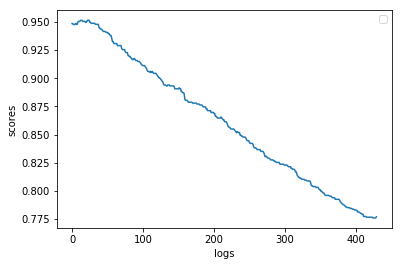

In [13]:
length = len(result)
scores = []
for x in result:
    score, mtx = x
    scores.append(score)
draw(powlist[:length], scores)